In [10]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt

%matplotlib inline

In [11]:
# Enter the begin and end dates for the gage and flow data

begin_date = '2023-01-01T00:00:00.000-05:00'
end_date = '2024-10-21T00:00:00.000-05:00'

#08393610 - Rio Hondo, Roswell NM

In [12]:
#Read in raw stream gage data
gage = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=08393610&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
gage = gage.iloc[1: , :]

In [13]:
gage

,agency_cd,site_no,datetime,tz_cd,101398_00065,101398_00065_cd
1,USGS,08393610,2022-12-31 23:00,MST,6.21,A
2,USGS,08393610,2022-12-31 23:15,MST,6.20,A
3,USGS,08393610,2022-12-31 23:30,MST,6.19,A
4,USGS,08393610,2022-12-31 23:45,MST,6.20,A
5,USGS,08393610,2023-01-01 00:00,MST,6.18,A
...,...,...,...,...,...,...
61955,USGS,08393610,2024-10-20 22:00,MDT,10.22,P
61956,USGS,08393610,2024-10-20 22:15,MDT,10.17,P
61957,USGS,08393610,2024-10-20 22:30,MDT,10.14,P
61958,USGS,08393610,2024-10-20 22:45,MDT,10.12,P


In [14]:
gage['101398_00065'] = gage['101398_00065'].astype(float)
gage = gage[['datetime','101398_00065']]
gage = gage.set_index('datetime')
gage['item_id'] = 'gage'
gage  = gage.rename(columns={"101398_00065": "series"})
gage.head()

,series,item_id
datetime,,
2022-12-31 23:00,6.21,gage
2022-12-31 23:15,6.20,gage
2022-12-31 23:30,6.19,gage
2022-12-31 23:45,6.20,gage
2023-01-01 00:00,6.18,gage


In [19]:
#Read in raw flow data
flow = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=08393610&parameterCd=00060&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=28)
flow = flow.iloc[1: , :]

In [20]:
flow

,agency_cd,site_no,datetime,tz_cd,101399_00060,101399_00060_cd
1,USGS,08393610,2022-12-31 23:00,MST,9.62,A
2,USGS,08393610,2022-12-31 23:15,MST,9.39,A
3,USGS,08393610,2022-12-31 23:30,MST,9.16,A
4,USGS,08393610,2022-12-31 23:45,MST,9.39,A
5,USGS,08393610,2023-01-01 00:00,MST,8.94,A
...,...,...,...,...,...,...
62107,USGS,08393610,2024-10-20 22:00,MDT,334,P
62108,USGS,08393610,2024-10-20 22:15,MDT,326,P
62109,USGS,08393610,2024-10-20 22:30,MDT,321,P
62110,USGS,08393610,2024-10-20 22:45,MDT,318,P


In [21]:
flow['101399_00060'] = flow['101399_00060'].astype(float)
flow = flow[['datetime','101399_00060']]# Merge datasets together on datetime index and check if everything is good
flow = flow.set_index('datetime')
flow['item_id'] = 'flow'

            
#df=pd.merge(gage, flow, how='inner', left_index=True, right_index=True)
#df.head()
flow  = flow.rename(columns={"101399_00060": "series"})

flow.head()

,series,item_id
datetime,,
2022-12-31 23:00,9.62,flow
2022-12-31 23:15,9.39,flow
2022-12-31 23:30,9.16,flow
2022-12-31 23:45,9.39,flow
2023-01-01 00:00,8.94,flow


In [22]:
merge = pd.concat([gage, flow])

In [23]:
merge

,series,item_id
datetime,,
2022-12-31 23:00,6.21,gage
2022-12-31 23:15,6.20,gage
2022-12-31 23:30,6.19,gage
2022-12-31 23:45,6.20,gage
2023-01-01 00:00,6.18,gage
...,...,...
2024-10-20 22:00,334.00,flow
2024-10-20 22:15,326.00,flow
2024-10-20 22:30,321.00,flow


In [24]:
df = merge.reset_index()

In [25]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


In [26]:
df.drop_duplicates(subset=duplicate, inplace=True) #, 

In [27]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [28]:
df = df.set_index('datetime')

In [29]:
df.reset_index(inplace=True)

In [30]:
df

,datetime,series,item_id
0,2022-12-31 23:00:00,6.21,gage
1,2022-12-31 23:15:00,6.20,gage
2,2022-12-31 23:30:00,6.19,gage
3,2022-12-31 23:45:00,6.20,gage
4,2023-01-01 00:00:00,6.18,gage
...,...,...,...
124065,2024-10-20 22:00:00,334.00,flow
124066,2024-10-20 22:15:00,326.00,flow
124067,2024-10-20 22:30:00,321.00,flow
124068,2024-10-20 22:45:00,318.00,flow


In [31]:
train_data = TimeSeriesDataFrame.from_data_frame(df, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
train_data.head()


series
item_id timestamp                  
gage    2022-12-31 23:00:00    6.21
        2022-12-31 23:15:00    6.20
        2022-12-31 23:30:00    6.19
        2022-12-31 23:45:00    6.20
        2023-01-01 00:00:00    6.18

In [32]:
#test_data.head()

In [33]:
train_data = train_data.convert_frequency(freq='h', agg_numeric="max")

In [34]:
train_data.head()

series
item_id timestamp                  
gage    2022-12-31 23:00:00    6.21
        2023-01-01 00:00:00    6.19
        2023-01-01 01:00:00    6.18
        2023-01-01 02:00:00    6.17
        2023-01-01 03:00:00    6.15

In [40]:
prediction_length = 6 #this is for 6 hours
item_id = "gage"
train_data, test_data = train_data.train_test_split(prediction_length)

In [41]:
train_data

series
item_id timestamp                   
gage    2022-12-31 23:00:00     6.21
        2023-01-01 00:00:00     6.19
        2023-01-01 01:00:00     6.18
        2023-01-01 02:00:00     6.17
        2023-01-01 03:00:00     6.15
...                              ...
flow    2024-10-20 07:00:00  3340.00
        2024-10-20 08:00:00  3190.00
        2024-10-20 09:00:00  2950.00
        2024-10-20 10:00:00  2600.00
        2024-10-20 11:00:00  2280.00

[31610 rows x 1 columns]

In [42]:
test_data

series
item_id timestamp                   
gage    2022-12-31 23:00:00     6.21
        2023-01-01 00:00:00     6.19
        2023-01-01 01:00:00     6.18
        2023-01-01 02:00:00     6.17
        2023-01-01 03:00:00     6.15
...                              ...
flow    2024-10-20 13:00:00  1620.00
        2024-10-20 14:00:00  1320.00
        2024-10-20 15:00:00  1060.00
        2024-10-20 16:00:00   862.00
        2024-10-20 17:00:00   715.00

[31622 rows x 1 columns]

In [47]:
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    path="rio_hondo_gage_autogluon_"+str(prediction_length),
    target="series",
    eval_metric="RMSE",
)

predictor.fit(
    train_data,
    presets="high_quality",
    num_val_windows = 8,#
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'rio_hondo_gage_autogluon_6'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:16:46 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T8112
CPU Count:          8
GPU Count:          0
Memory Avail:       5.64 GB / 16.00 GB (35.2%)
Disk Space Avail:   580.13 GB / 926.35 GB (62.6%)
Setting presets to: high_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 8,
 'prediction_length': 6,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'series',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series f

In [48]:
predictions = predictor.predict(test_data)
predictions

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
gage    2024-10-20 18:00:00   11.957477   11.606458   11.711542   11.788844   
        2024-10-20 19:00:00   11.964526   11.448157   11.610316   11.730238   
        2024-10-20 20:00:00   12.164854   11.483568   11.694810   11.824917   
        2024-10-20 21:00:00   12.169772   11.469660   11.609937   11.804792   
        2024-10-20 22:00:00   12.168460   11.383238   11.582526   11.780935   
        2024-10-20 23:00:00   12.166001   11.295741   11.533204   11.762662   
flow    2024-10-20 18:00:00  704.783329  609.011529  637.659496  658.736301   
        2024-10-20 19:00:00  704.884641  563.751330  608.057283  640.825978   
        2024-10-20 20:00:00  763.268903  576.892812  634.664065  670.226848   
        2024-10-20 21:00:00  766.383657  574.842707  613.145550  666.471677   
        2024-10-20 22:00:00  765.563985  550.674401  605.166226  659.466864   
        2024-10-20 23:00:00  764.088575  525.870025  590.834651  653.652701   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
gage    2024-10-20 18:00:00   11.890111   11.971932   12.059416   12.138150   
        2024-10-20 19:00:00   11.840172   11.940363   12.028088   12.150219   
        2024-10-20 20:00:00   11.992282   12.112601   12.266268   12.397212   
        2024-10-20 21:00:00   11.916206   12.023367   12.199790   12.392313   
        2024-10-20 22:00:00   11.930050   12.074909   12.243627   12.442284   
        2024-10-20 23:00:00   11.945189   12.175240   12.320896   12.487303   
flow    2024-10-20 18:00:00  686.406396  708.749033  732.644909  754.133568   
        2024-10-20 19:00:00  670.873718  698.255802  722.218233  755.612085   
        2024-10-20 20:00:00  716.030202  748.934056  790.986292  826.798337   
        2024-10-20 21:00:00  696.925125  726.219502  774.515089  827.219754   
        2024-10-20 22:00:00  700.263316  739.899442  786.080718  840.468603   
        2024-10-20 23:00:00  703.615503  766.622905  806.477575  852.018590   

                                    0.8          0.9  
item_id timestamp                                     
gage    2024-10-20 18:00:00   12.225975    12.378541  
        2024-10-20 19:00:00   12.293239    12.488863  
        2024-10-20 20:00:00   12.561250    12.776353  
        2024-10-20 21:00:00   12.544550    12.748639  
        2024-10-20 22:00:00   12.599968    12.925695  
        2024-10-20 23:00:00   12.666820    13.040345  
flow    2024-10-20 18:00:00  778.097171   819.771202  
        2024-10-20 19:00:00  794.717718   848.204027  
        2024-10-20 20:00:00  871.669823   930.499924  
        2024-10-20 21:00:00  868.853557   924.661883  
        2024-10-20 22:00:00  883.597141   972.775016  
        2024-10-20 23:00:00  901.135596  1003.426434

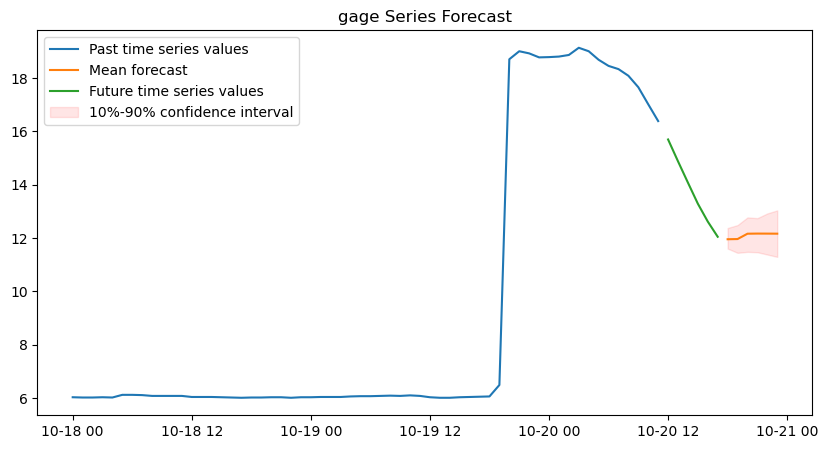

In [49]:
# TimeSeriesDataFrame can also be loaded directly from a file

#test_data = predictions

item_id = 'gage'

plt.figure(figsize=(10, 5))
plt.title(item_id+' Series Forecast')

y_past = train_data.loc[item_id]["series"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["series"]
plt.plot(y_past[-60:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test[prediction_length:], label="Future time series values")

plt.fill_between(y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval")
plt.legend(loc = 'upper left');
plt.savefig(item_id+'_forecast_'+str(prediction_length)+'.png')

In [50]:
y_pred[['mean', '0.1', '0.9']]

,mean,0.1,0.9
timestamp,,,
2024-10-20 18:00:00,11.957477,11.606458,12.378541
2024-10-20 19:00:00,11.964526,11.448157,12.488863
2024-10-20 20:00:00,12.164854,11.483568,12.776353
2024-10-20 21:00:00,12.169772,11.469660,12.748639
2024-10-20 22:00:00,12.168460,11.383238,12.925695
2024-10-20 23:00:00,12.166001,11.295741,13.040345


In [51]:
predictions.info()

<class 'autogluon.timeseries.dataset.ts_dataframe.TimeSeriesDataFrame'>
MultiIndex: 12 entries, ('gage', Timestamp('2024-10-20 18:00:00')) to ('flow', Timestamp('2024-10-20 23:00:00'))
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    12 non-null     float64
 1   0.1     12 non-null     float64
 2   0.2     12 non-null     float64
 3   0.3     12 non-null     float64
 4   0.4     12 non-null     float64
 5   0.5     12 non-null     float64
 6   0.6     12 non-null     float64
 7   0.7     12 non-null     float64
 8   0.8     12 non-null     float64
 9   0.9     12 non-null     float64
dtypes: float64(10)
memory usage: 1.4+ KB
